In this **breast cancer analysis** (using Wisconsin Diagnostic data), I have done **visual Exploratory data analysis** to understand the features that are good for classification for Malignant and Benign types of cancer, using **Random Forest Classifier** to predict the outcomes and determine the feature importances. 

**Importing the necessary packages and reading the CSV File**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cancer = pd.read_csv("../input/data.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**features overview**

1. ID - unique identification
2. diagnosis - two values M-'Malignant' B-'Benign
3. radius - mean of distances from center to points on the perimeter
4. texture - standard deviation of gray-scale values
5. perimeter
6. area 
7. smoothness - local variation in radius lengths
8. compactness - perimeter^2 / area - 1.0
9. concavity - severity of concave portions of the contour
10. concave points - number of concave portions of the contour
11. symmetry
12. fractal dimension - (coastline approximation) - 1

**Basic Quantitative EDA** to get the count of the features, mean and other basic values to understand the data in a better way:

In [3]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


We can see that **Unnamed:32** and **id** are of no use, and may interfere with our model in an improper manner, so we can drop these columns from our dataframe.

In [4]:
cancer.drop(['id','Unnamed: 32'], axis=1, inplace=True)
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**checking for missing values** 

In [5]:
cancer.isnull().sum().sort_values(ascending=False)

fractal_dimension_worst    0
area_se                    0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
smoothness_se              0
symmetry_worst             0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
diagnosis                  0
dtype: int64

From above. it can be concluded that there are **no missing values** in the dataframe, and we can begin working with the data now:

counts of Malignant and Benign 
 B    357
M    212
Name: diagnosis, dtype: int64


Text(0.5,1,'Distribution of Malignant & Benign')

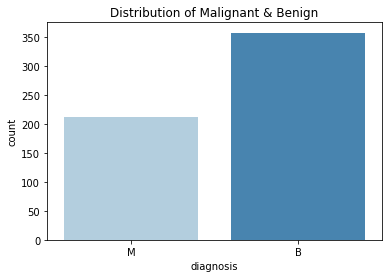

In [6]:
print('counts of Malignant and Benign \n',cancer['diagnosis'].value_counts())
sns.countplot(cancer['diagnosis'],palette="Blues")
plt.title('Distribution of Malignant & Benign')

Now, we split all the features according to **mean, standard error and worst** into different dataframes

In [7]:
features_mean = cancer[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
features_se = cancer[['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]
features_worst = cancer[['diagnosis','radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 
'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst',
                   'fractal_dimension_worst']]

**Visualisation**

Visualising features for mean, standard error and worst types of features to understand the correlation between them and the distribution for classification of Malignant and Bengin types of cancer.

**Visualising fetaures for mean values**

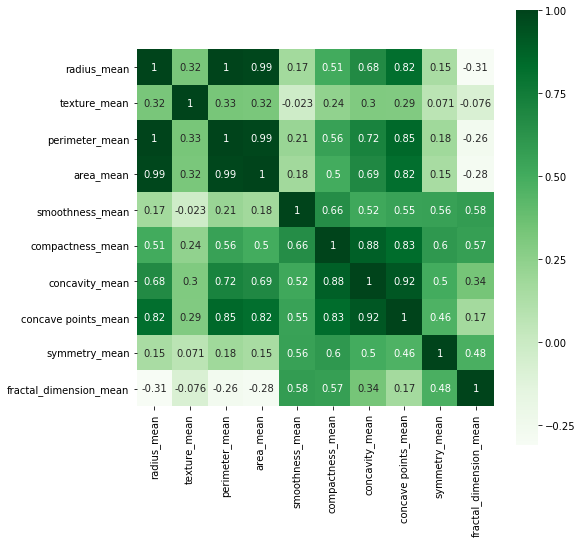

In [8]:
mean_correlation = features_mean.corr()
plt.figure(figsize=(8,8))
sns.heatmap(mean_correlation,vmax=1,square=True,annot=True,cmap='Greens')

From the above **Heat map of mean values**  it can be concluded that **area_mean,perimeter_mean and radius_mean have correlation with each other** therefore one best feature can be used from them to predict and similar with **compactness_mean,concave points_mean and concavity_mean.**

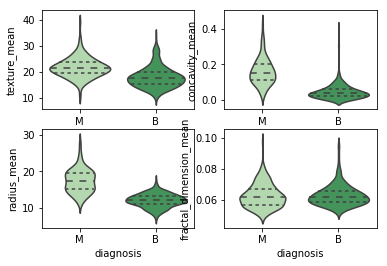

In [9]:
plt.subplot(221)
sns.violinplot(x='diagnosis',y='texture_mean',data=features_mean,palette="Greens",inner="quartile")
plt.subplot(222)
sns.violinplot(x='diagnosis',y='concavity_mean',data=features_mean,palette="Greens",inner="quartile")
plt.subplot(223)
sns.violinplot(x='diagnosis',y='radius_mean',data=features_mean,palette="Greens",inner="quartile")
plt.subplot(224)
sns.violinplot(x='diagnosis',y='fractal_dimension_mean',data=features_mean,palette="Greens",inner="quartile")
plt.show()

From above **violin plots**, we find out that **texture_mean and concavity_mean** are good features for classification as they segregate better Malignant and Benign types but **fractal_dimension_mean**, one of the features, has almost a similar mean and a similar distribution, and hence is not a good parameter for classification.

**Visualising features for standard error values**

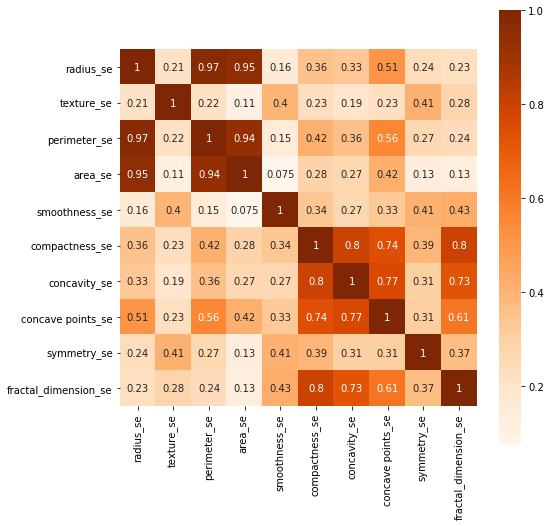

In [10]:
se_correlation = features_se.corr()
plt.figure(figsize=(8,8))
sns.heatmap(se_correlation,vmax=1,square=True,annot=True,cmap='Oranges')

From the above **Heatmap** of the **standard error values**  it can be concluded that **area_se,perimeter_se and radius_se have correlation with each other**, which is also the case with **compactness_se,concave points_se and concavity_se.** and hence, one best feature can be used from them for further classification during prediction.  

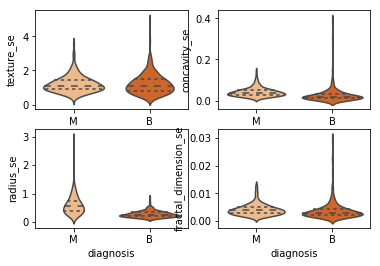

In [11]:
plt.subplot(221)
sns.violinplot(x='diagnosis',y='texture_se',data=features_se,palette="Oranges",inner="quartile")
plt.subplot(222)
sns.violinplot(x='diagnosis',y='concavity_se',data=features_se,palette="Oranges",inner="quartile")
plt.subplot(223)
sns.violinplot(x='diagnosis',y='radius_se',data=features_se,palette="Oranges",inner="quartile")
plt.subplot(224)
sns.violinplot(x='diagnosis',y='fractal_dimension_se',data=features_se,palette="Oranges",inner="quartile")
plt.show()

From above **violin plots , radius_se and concavity_se** are good features for classification as they segregate better Malignant and Benign types but **fractal_dimension_mean** has same mean and similar pattern for classification, and hence is not a good parameter to do so.

**Visualising features for worst values**

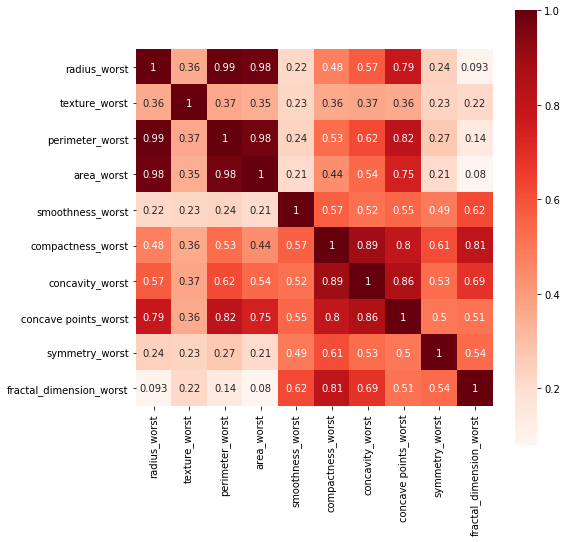

In [12]:
worst_correlation = features_worst.corr()
plt.figure(figsize=(8,8))
sns.heatmap(worst_correlation,vmax=1,square=True,annot=True,cmap='Reds')

Similarly in the **Heatmap of worst values area, radius and perimeter**, we find out that they are intercorrelated with each other. A similar case arises with **compactness_worst, concavity_worst,concave points_worst**. This means that we can use one from each of the sets.

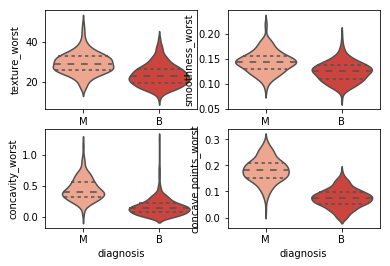

In [13]:
plt.subplot(221)
sns.violinplot(x='diagnosis',y='texture_worst',data=features_worst,palette="Reds",inner="quartile")
plt.subplot(222)
sns.violinplot(x='diagnosis',y='smoothness_worst',data=features_worst,palette="Reds",inner="quartile")
plt.subplot(223)
sns.violinplot(x='diagnosis',y='concavity_worst',data=features_worst,palette="Reds",inner="quartile")
plt.subplot(224)
sns.violinplot(x='diagnosis',y='concave points_worst',data=features_worst,palette="Reds",inner="quartile")
plt.show()

From the above plots, we find out that **concavity_worst and concave points_worst** have similar plots so we can use one of them. Along with that, we find out that **texture_se and radius_se** can be used for classification.

Visualising and selecting best from **radius , area and perimeter** for classification using pairplots and swarmplots to see which of them seperates the types of cancer better than the others.

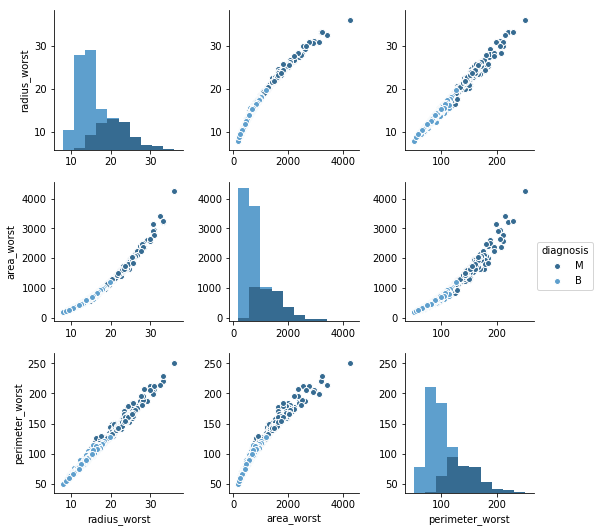

In [14]:
pairplot = cancer[['diagnosis','radius_worst','area_worst','perimeter_worst']]
sns.pairplot(pairplot,hue='diagnosis',palette="Blues_d")
plt.show()

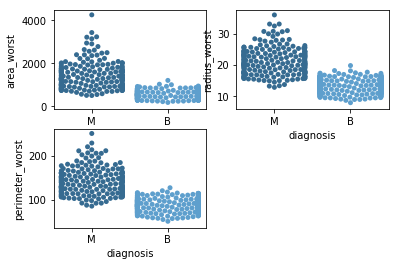

In [15]:
plt.subplot(221)
sns.swarmplot(x='diagnosis',y='area_worst',data=pairplot,palette="Blues_d")
plt.subplot(222)
sns.swarmplot(x='diagnosis',y='radius_worst',data=pairplot,palette="Blues_d")
plt.subplot(223)
sns.swarmplot(x='diagnosis',y='perimeter_worst',data=pairplot,palette="Blues_d")
plt.show()

We can use **radius** among them. This is because it it better classifies Malignant & Benign types, and both area aong with the perimeter depend on radius.

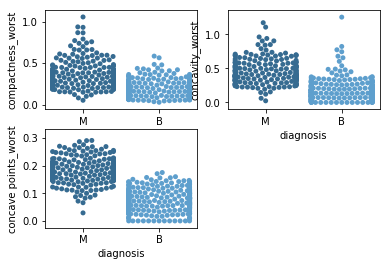

In [16]:
plt.subplot(221)
sns.swarmplot(x='diagnosis',y='compactness_worst',data=features_worst,palette="Blues_d")
plt.subplot(222)
sns.swarmplot(x='diagnosis',y='concavity_worst',data=features_worst,palette="Blues_d")
plt.subplot(223)
sns.swarmplot(x='diagnosis',y='concave points_worst',data=features_worst,palette="Blues_d")
plt.show()

And from these plots we can clearly see that **concavity_worst** can be used for classification among these three.

**Feature selection**

selecting features based on above visualisation and correlations
1. radius_mean 
2. texture_mean 
3. smoothness_mean
4. concavity_mean 
5. symmetry_mean
6. radius_se 
7. texture_se
8. smoothness_se
9. concavity_se 
10. symmetry_se
11. radius_worst 
12. texture_worst
13. smoothness_worst
14. concavity_worst
15. symmetry_worst

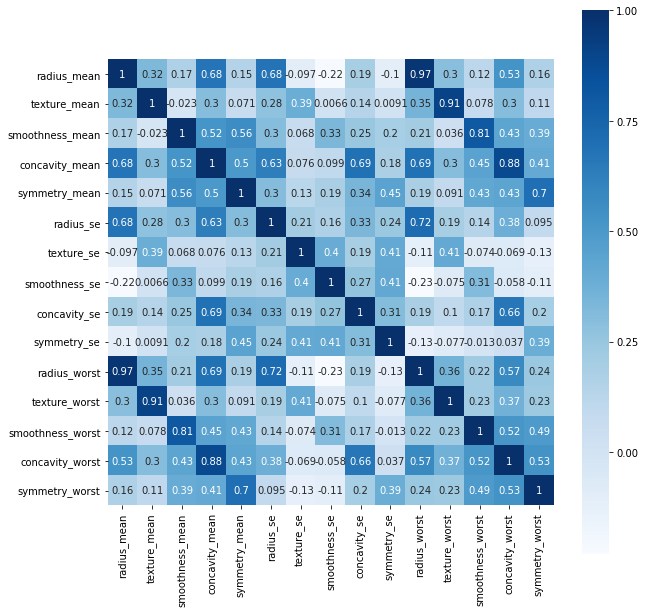

In [17]:
features_corr = cancer[['diagnosis','radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean','symmetry_mean',
       'radius_se', 'texture_se', 'smoothness_se','concavity_se', 'symmetry_se','radius_worst', 'texture_worst',
       'smoothness_worst','concavity_worst','symmetry_worst']]
features_correlation = features_corr.corr()
plt.figure(figsize=(10,10))
sns.heatmap(features_correlation,vmax=1,square=True,annot=True,cmap='Blues')
plt.show()

For cross validation of the results we may use the train_test_split. And we are fitting the above selected features using **Random Forest Classifier**.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features_corr['diagnosis'] = [0 if x == 'B' else 1 for x in features_corr['diagnosis']]
X = features_corr.drop(['diagnosis'],axis = 1 )
y = features_corr.diagnosis

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.3,random_state=42)
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,y_train)
print('Accuracy score',rfc.score(X_test,y_test))

Accuracy score 0.976608187135


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Performance metrics** to check the model accuracy

Classification Report
             precision    recall  f1-score   support

          0       0.96      1.00      0.98       108
          1       1.00      0.94      0.97        63

avg / total       0.98      0.98      0.98       171

[ 0.96521739  0.95652174  0.98230088  0.96460177  0.97345133]
Average 5-Fold CV Score: 0.9684186225471334


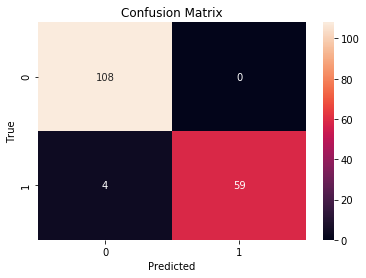

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = rfc.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print('Classification Report')
print(classification_report(y_test,y_pred))

from sklearn.model_selection import cross_val_score
import numpy as np
rfc = RandomForestClassifier()
cv_results = cross_val_score(rfc,X,y,cv=5)
print(cv_results)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

**ROC Curve** to check the accuracy and detect the performance of the model:

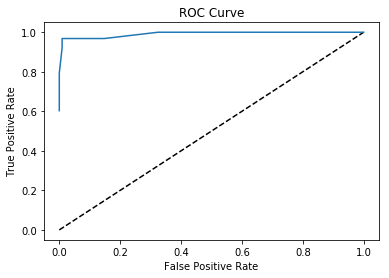

In [20]:
from sklearn.metrics import roc_curve
rfc.fit(X_train,y_train)
y_pred_prob  =  rfc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Now taking all the features of the dataset and fitting them using the **RandomForestClassifier**.

In [21]:
df = pd.read_csv("../input/data.csv")
df['diagnosis'] = [0 if x == 'B' else 1 for x in df['diagnosis']]
y = df.diagnosis        
list = ['Unnamed: 32','id','diagnosis']
X = df.drop(list,axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
print('train score',forest.score(X_train,y_train))
print('test score',forest.score(X_test,y_test))

train score 1.0
test score 0.964912280702


**Correlation of diagnosis** with other features sorted reverse (descending order), which tells us that the radius parameters relate to the classification better than their area counterparts.

In [22]:
corr=df.corr()['diagnosis']
corr[np.argsort(corr,axis=0)[::-1]]

Unnamed: 32                     NaN
diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0

Detecting **Feature Importances**, from which we conclude that the worst parameters classify better than the others:

radius_mean = 0.015096623145
texture_mean = 0.0173662386138
perimeter_mean = 0.0658625324238
area_mean = 0.0149948574539
smoothness_mean = 0.00484340761912
compactness_mean = 0.00242444619054
concavity_mean = 0.094741121984
concave points_mean = 0.0805328291798
symmetry_mean = 0.00207198925034
fractal_dimension_mean = 0.00599405609529
radius_se = 0.013842453718
texture_se = 0.000115949331705
perimeter_se = 0.00561735246378
area_se = 0.00937150614457
smoothness_se = 0.00671418210303
compactness_se = 0.0033319292928
concavity_se = 0.00826195729836
concave points_se = 0.00890911700331
symmetry_se = 0.00838638004576
fractal_dimension_se = 0.00828694160638
radius_worst = 0.0621508536222
texture_worst = 0.0305713753694
perimeter_worst = 0.0840229267906
area_worst = 0.268314343736
smoothness_worst = 0.00558847138947
compactness_worst = 0.0138179955903
concavity_worst = 0.0717636739682
concave points_worst = 0.0560533542733
symmetry_worst = 0.0241381747892
fractal_dimension_worst = 0.006812959

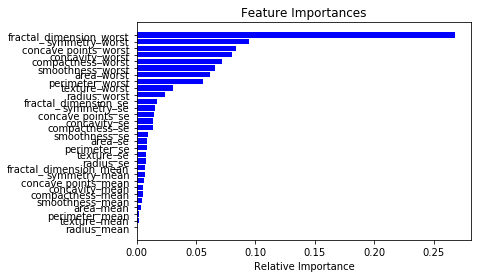

In [23]:
features = X.columns
for name, importance in zip(features, forest.feature_importances_):
    print(name, "=", importance)

importances = forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

**Performance metrics**: classification_report, confusion_matrics and cross_val_score

Classification Report
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       108
          1       0.97      0.94      0.95        63

avg / total       0.96      0.96      0.96       171

[ 0.94782609  0.91304348  0.96460177  0.97345133  0.97345133]
Average 5-Fold CV Score: 0.9544747979992305


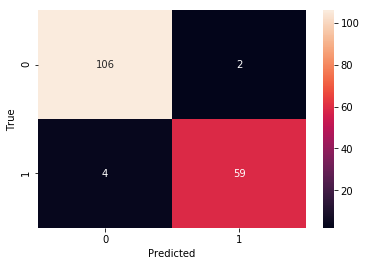

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = forest.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt='')
plt.xlabel('Predicted')
plt.ylabel('True')
print('Classification Report')
print(classification_report(y_test,y_pred))

from sklearn.model_selection import cross_val_score
import numpy as np
cv_results = cross_val_score(forest,X,y,cv=5)
print(cv_results)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

**ROC Curve** for the model accuracy detection:

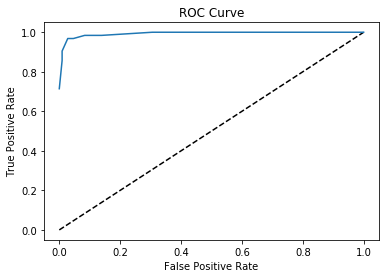

In [25]:
from sklearn.metrics import roc_curve
rfc.fit(X_train,y_train)
y_pred_prob  =  forest.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**Conclusion**
 From the above results we come to a conclusion that the methods employed here are prediction and implementation worthy, and give a better classification of the types of cancers: Benign and Malignant types. Hence,** taking the mean, standard deviation and worst values for radius, texture, smoothness, concavity and symmetry parameters was a good idea.**